Olá, Merhi!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


Importando bibliotecas que serão usadas

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

Lendo arquivo csv  e analizando as informações nele

In [2]:
df = pd.read_csv('/datasets/games.csv')
print(df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [3]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
print(df.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object


*Concluções a respeito dos dados brutos:*
O nome das colunas possui sua primeira  letra maiuscula o que prejudicará na analise de dados feitas posteriormente, será a primeira coisa a ser tratada.
O numero de dados não nulos é menor em muitas colunas o que significa que a muitos dados nulos o que não é necessariamente um problema, será feita uma analise previa para a tentativa de alteração desses dados por informações mais uteis. Na pior das hipoteses serão substituidos por dados 'unknown', desconhecidos em portugues.


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

O estudante fez o estudo inicial dos dados usando as funções `head()` e `info()`. Além disso, estudou os tipos de dados.
    
<br>
    
Como sugestão, considere executar essas funções em células separadas para isolar a saída de cada análise e facilitar a leitura.
</div>

Modificando os nomes das colunas para que possuam apenas letras minusculas 

In [6]:
df.columns = [col.lower() for col in df.columns]
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
O seu código está correto, mas considere como sugestão fazer a conversão diretamente, pois `df.columns` já é uma lista:
    
```df.columns.str.lower()```
</div>

In [7]:
valores_unicos = df['rating'].unique()
print(valores_unicos)

#segundo a classificação Entertainment Software Rating Board (ESRB), que pro sinal é a utilizada aqui, 'RP' é utilizado quando há uma classificação ausente logo subsituirei os NaN por 'RP'
df['rating'] = df['rating'].fillna('RP')
print(df['rating'].head())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
0     E
1    RP
2     E
3     E
4    RP
Name: rating, dtype: object


In [8]:
name_nan = df[pd.isna(df['name'])]
print(name_nan)
print(name_nan.info())

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN     RP  
14244         0.00           NaN        NaN     RP  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 659 to 14244
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             0 non-null      object 
 1   platform         2 non-null      object 
 2   year_of_release  2 non-null      float64
 3   genre            0 non-null      object 
 4   na_sales         2 non-null      float64
 5   eu_sales         2 non-null      float64
 6   jp_sales         2 non-null      float64
 7   other_sales      2 non-null      float64
 8   critic_score     0 non-null      float64

*Primeira constatação*
Todo titulo de jogo nulo tem também seu genero, pontuação de usuario e pontuação de criticos, o que me leva minha primeira hipotese.

*Primeira hipotese*
Os jogos que não tiveram seus nomes revelados possuem um numero de vendas considerado irrelevante, uma vez que não tem a pontução dadas pelos usuarios nem dos críticos, o que me faz pensar que não foi relevante nem aos usarios nem as críticos. Portanto para atestar minha hipótese checarei o valor de vendas desses jogos.

In [9]:
# Criando um DataFrame para jogos com nomes nulos
name_nan = df[pd.isna(df['name'])].copy()

# Calculando o total de vendas para esses jogos
name_nan['total_sales_nan'] = name_nan[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Calculando o percentil 80 de vendas de todos os jogos no DataFrame original
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
percentil_80 = df['total_sales'].quantile(0.80)

# Atribuindo relevância aos jogos com nome nulo baseado no critério de vendas
name_nan['relevant'] = name_nan['total_sales_nan'] >= percentil_80

# Atualizando o nome dos jogos com nome nulo no DataFrame original com base na relevância
df.loc[df['name'].isna() & name_nan['relevant'], 'name'] = 'Game Relevant'
df.loc[df['name'].isna() & ~name_nan['relevant'], 'name'] = 'Game Irrelevant'

df['relevant'] = df['total_sales'] >= percentil_80

# Verificando a atualização
print(df[df['name'].isin(['Game Relevant', 'Game Irrelevant'])])


                  name platform  year_of_release genre  na_sales  eu_sales  \
659      Game Relevant      GEN           1993.0   NaN      1.78      0.53   
14244  Game Irrelevant      GEN           1993.0   NaN      0.00      0.00   

       jp_sales  other_sales  critic_score user_score rating  total_sales  \
659        0.00         0.08           NaN        NaN     RP         2.39   
14244      0.03         0.00           NaN        NaN     RP         0.03   

       relevant  
659        True  
14244     False  


*Conclusão da hipose*
Minha hipotese se comprovou falsa quando um dos jogos se provou com numero de vendas relevante. No entando, o metodo que utilizei me permite nomear de forma pratica para minhas analizes posteriores como coloquei no codigo acima

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Excelente análise. Levantar e testar hipótese é uma etapa essencial de qualquer análise exploratória de dados.

</div>

Genero,  critic_score e user_score são dados NaN que fica impossivel supor, no caso do genero renomear desconhecido não rejudicaria a analize no futuro, mas critic_score e user_score, por serem dados numericos terei de mudar para zero. Assim como critic_score e user_score o ano de lançamento sinalizarei diferente com o zero, pois precisaremos do ano como inteiro, mas poderia ser pesquisado e ajustado manualmente no futuro com a informação faltante.

In [10]:
df['genre'] = df['genre'].fillna('Desconhecido')
df['critic_score'] = df['critic_score'].fillna(0.0)
df['user_score'] = df['user_score'].fillna(0.0)
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').fillna(0).astype(int)

df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
 12  relevant         16715 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 1.5+ MB
None


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>O estudo inicial que você apresentou dos tipos de dados mostra que os atributos `critic_score` e `user_score` são atributos numéricos e aqui você está preenchendo os valores com uma string e, portanto, misturando os tipos de dados.
    
<br>

Aqui você deve fazer o preenchimento usando o mesmo tipo de dado. Pense em uma forma de fazer esse preenchimento com um atributo numérico.</s>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor v2 </b> <a class="tocSkip"></a>

Perfeito!
</div>

Quantos jogos foram lançados em anos diferentes? Os dados de cada período são significativos?
Os graficos abaixo responderam essas perguntas.


In [11]:
games_per_year = df.groupby('year_of_release')['name'].size()
print(games_per_year)

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


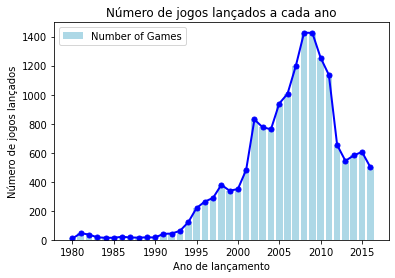

In [12]:
#Primeiro procedimento de filtragem 
df = df[(df['year_of_release'] >= 1980) & (df['year_of_release'] <= 2016)] 

# Segundo procedimento
games_per_year = games_per_year[games_per_year.index != 0]

# Agora crie o gráfico
plt.bar(games_per_year.index, games_per_year.values, color='lightblue', label='Number of Games')
plt.plot(games_per_year.index, games_per_year.values, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.xlabel('Ano de lançamento')
plt.ylabel('Número de jogos lançados')
plt.title('Número de jogos lançados a cada ano')
plt.legend()
plt.show()

Nota-se  crescente do lançamento de jogos até 2008 que se matém até 2010, que tem uma grande queda para 2013 e matem seu decilinio até 2016.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ótimo gráfico e análise. Considere manter o padrão de idioma das legendas e título. É interessante esse declínio ao longo dos anos, o que pode ser explicado por novas plataformas digitais sendo lançadas e títulos de outras plataformas que não estão representadas no conjunto de dados.
    
</div>

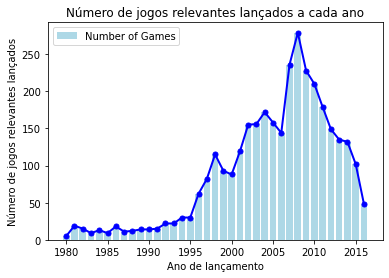

In [13]:
# Primeiro procedimento de filtragem
df = df[(df['year_of_release'] >= 1980) & (df['year_of_release'] <= 2016)]

# Filtrar apenas os jogos relevantes
df_relevant = df[df['relevant']]

# Contar o número de jogos por ano de lançamento
games_per_year = df_relevant.groupby('year_of_release')['name'].size()

# Segundo procedimento
games_per_year = games_per_year[games_per_year.index != 0]

# Criar o gráfico
plt.bar(games_per_year.index, games_per_year.values, color='lightblue', label='Number of Games')
plt.plot(games_per_year.index, games_per_year.values, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.xlabel('Ano de lançamento')
plt.ylabel('Número de jogos relevantes lançados')
plt.title('Número de jogos relevantes lançados a cada ano')
plt.legend()
plt.show()

Com esse grafico vemos que foi uma boa estrategia de negocio o alumento da produção dos jogos pois junto ao almento da criação de jogos houve também o umento de jogos relvantes e como sua quenda na produção também houve a quebra em sua relevância.


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Boa análise. Considere manter o padrão do idioma dos títulos e labels dos eixos.
</div>

Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

In [14]:
# Agrupa por plataforma e ano e calcule as vendas totais
platform_sales = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Aqui você poderia usar subplots para plotar dados para cada plataforma. Além disso, essa distribuição de valores não parece correta, pois está muito concentrada em algumas faixas. Verifique se esse trecho de código está realmente fazendo o que é esperado. Revise também o trecho abaixo para ter certeza que os dados não estão sendo filtrados.
    
```python
platform_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index
```

Referência: https://www.w3schools.com/python/matplotlib_subplot.asp.</s>
</div>

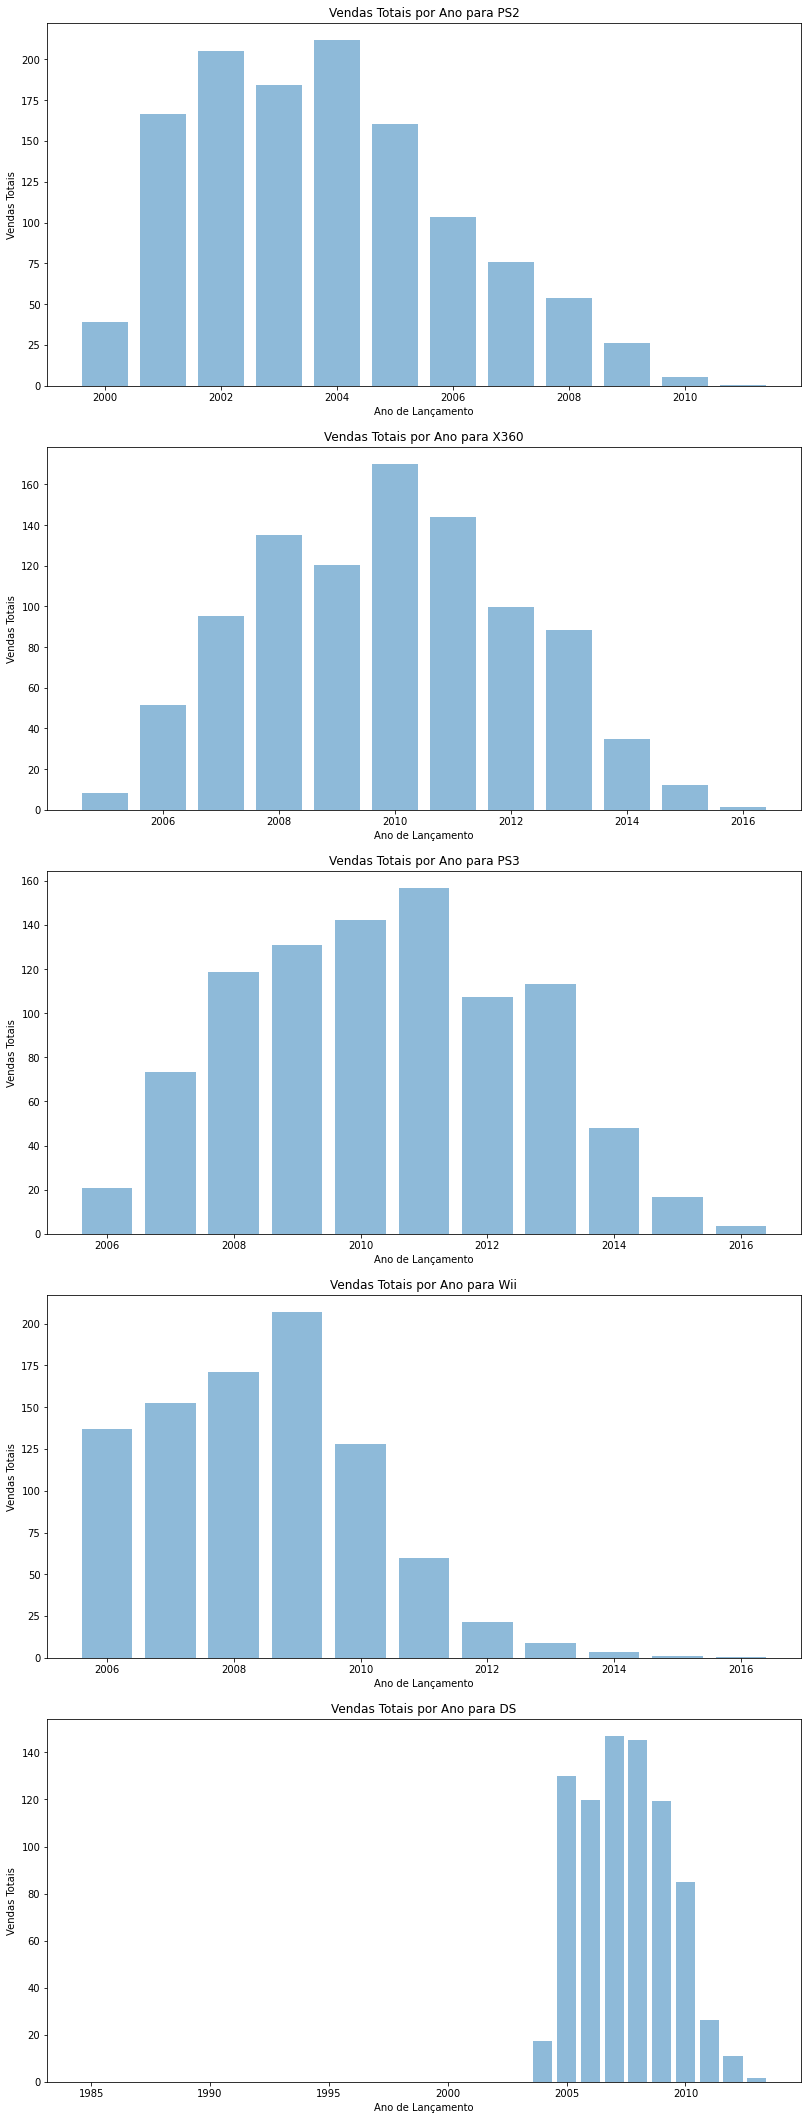

In [15]:
# Encontra as plataformas com as maiores vendas totais
top_platforms = platform_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index

# Cria subplots para cada uma das principais plataformas
fig, axes = plt.subplots(len(top_platforms), 1, figsize=(12, 6 * len(top_platforms)))
fig.tight_layout(pad=4.0)

for i, platform in enumerate(top_platforms):
    platform_data = platform_sales[platform_sales['platform'] == platform]
    axes[i].bar(platform_data['year_of_release'], platform_data['total_sales'], alpha=0.5)
    axes[i].set_title(f'Vendas Totais por Ano para {platform}')
    axes[i].set_xlabel('Ano de Lançamento')
    axes[i].set_ylabel('Vendas Totais')
    
# Encontra as plataformas que não têm vendas nos anos mais recentes
recent_year = platform_sales['year_of_release'].max()
platforms_without_sales = platform_sales[(platform_sales['year_of_release'] == recent_year) & 
                                         (~platform_sales['platform'].isin(top_platforms))]

# Determina quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem
platform_lifecycle = platform_sales.groupby('platform')['year_of_release'].agg(['min', 'max'])


<div class="alert alert-block alert-success">
<b> Comentário do revisor v2 </b> <a class="tocSkip"></a>

Correto!
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Exiba os valores de vendas totais também para cada plataforma.</s>
</div>

In [16]:
print("\nPlataformas que não têm vendas nos anos mais recentes:")
print(platforms_without_sales['platform'])


Plataformas que não têm vendas nos anos mais recentes:
17      3DS
118      PC
156     PS4
174     PSV
212    WiiU
237    XOne
Name: platform, dtype: object


In [31]:
def print_first_appearance(df):
    earliest_appearance = df.groupby('platform')['year_of_release'].min()
    print("\nAno de primeira aparição de cada plataforma:")
    print(earliest_appearance)

In [18]:
def print_last_appearance(df):
    latest_appearance = df.groupby('platform')['year_of_release'].max()
    print("\nAno de última aparição de cada plataforma:")
    print(latest_appearance)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Perfeito!
</div>

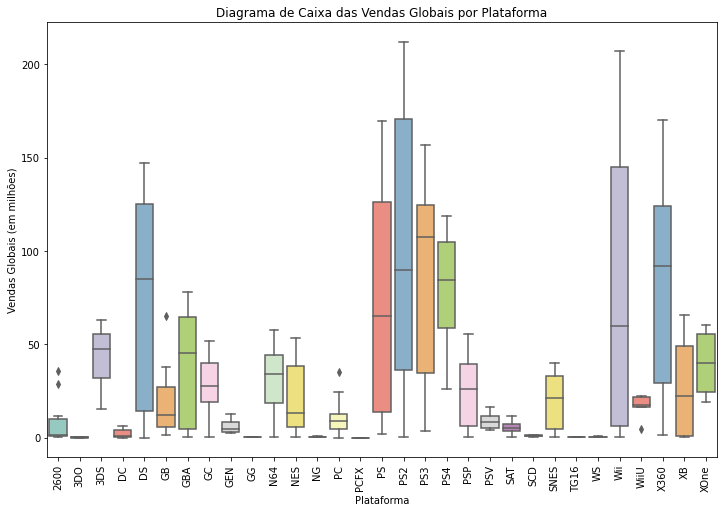

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=platform_sales, palette='Set3')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.title('Diagrama de Caixa das Vendas Globais por Plataforma')
plt.xticks(rotation=90)
plt.show()

Aqui estão as plataformas líderes em vendas com base nas vendas totais acumuladas:

PS2 (PlayStation 2): Líder em vendas com vendas totais acumuladas significativas.

X360 (Xbox 360): Plataforma com vendas totais acumuladas consideráveis, embora abaixo do PS2.

PS3 (PlayStation 3): Também possui vendas totais acumuladas significativas.

Wii (Nintendo Wii): Apesar de não liderar, ainda tem vendas totais acumuladas consideráveis.

DS (Nintendo DS): Outra plataforma com vendas totais acumuladas notáveis.



Pelo diagrama caixa fica evidente a grande variedade de vendas dos diversos consoles, no entanto pelo fator da mediana do ps3 ser a mais alta me indica sua liderança nas vendas, no entando a outros consoles que posuuiram grande consitencia e destaque como pontei na lista

Plataformas em Crescimento:

Não há evidências claras de plataformas em crescimento com base na variação percentual das vendas globais.A maioria das plataformas mostrou declínio nas vendas ao longo do tempo.

Plataformas Potencialmente Lucrativas:

Dada a ausência de plataformas em crescimento significativo, as oportunidades de lucro podem estar em focar nas plataformas líderes em vendas (PS2, X360, PS3, Wii, DS) devido às suas vendas totais acumuladas significativas. Também pode ser benéfico explorar plataformas mais recentes que não estão no topo das vendas, mas ainda têm vendas consideráveis, dependendo dos objetivos de negócios e estratégias de mercado.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Correto. Você interpretou corretamente o gráfico de caixa, ele é geralmente usado para analisar a distribuição e dispersão dos dados. Para análisar crescimento, como você observou, seria necessário explorar outros tipos de análise e representar os dados através de séries temporais.
</div>

Correlação entre Avaliações de Usuários e Vendas Globais: 0.25


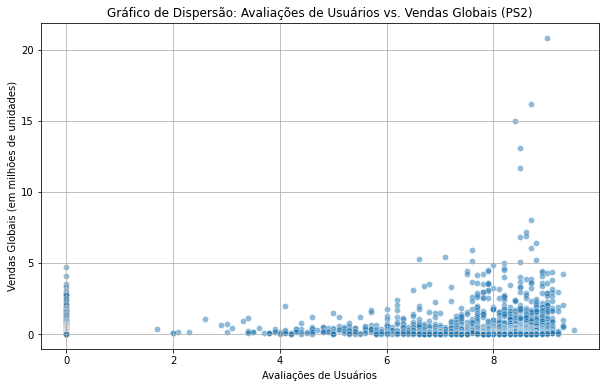

In [20]:
# Filtrando os dados apenas para a plataforma "PS2"
ps2_data = df[df['platform'] == 'PS2'].copy()  # Faça uma cópia para evitar o SettingWithCopyWarning

# Convertendo os valores da coluna 'total_sales' para números, tratando os valores não numéricos como NaN
ps2_data['total_sales'] = pd.to_numeric(ps2_data['total_sales'], errors='coerce')

# Convertendo os valores da coluna 'user_score' para números, tratando os valores não numéricos como NaN
ps2_data['user_score'] = pd.to_numeric(ps2_data['user_score'], errors='coerce')

# Criando um gráfico de dispersão entre as avaliações de usuários (user_score) e as vendas globais (total_sales)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps2_data, alpha=0.5)
plt.title('Gráfico de Dispersão: Avaliações de Usuários vs. Vendas Globais (PS2)')
plt.xlabel('Avaliações de Usuários')
plt.ylabel('Vendas Globais (em milhões de unidades)')
plt.grid(True)

# Calculando a correlação entre as avaliações de usuários e as vendas globais
correlation = ps2_data['user_score'].corr(ps2_data['total_sales'])
print(f"Correlação entre Avaliações de Usuários e Vendas Globais: {correlation:.2f}")

plt.show()

As vendas globais são diretamente proporcionais a avaliação dos usarios, ou seja quanto melhor avaliado maior suas vendas

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Correto!
</div>

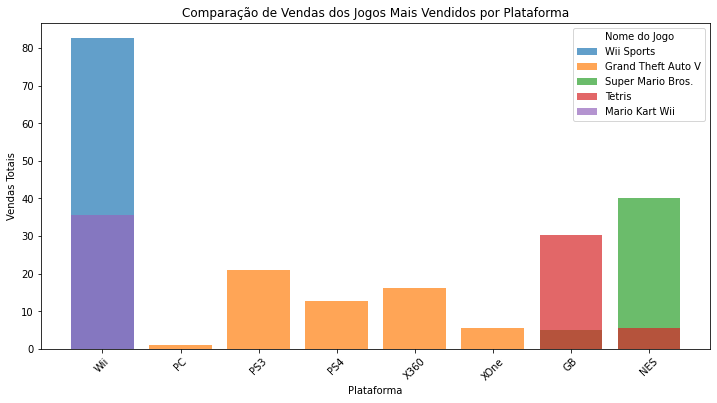

In [21]:
platform_sales_per_game = df.groupby(['platform', 'name'])['total_sales'].sum().reset_index()

# Primeiro, identificamos os jogos com as vendas totais mais altas em todas as plataformas.
top_games = platform_sales_per_game.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5).index

# Em seguida, filtramos o DataFrame original para incluir apenas as vendas dos jogos mais vendidos.
top_games_sales = platform_sales_per_game[platform_sales_per_game['name'].isin(top_games)]

# Agora, criamos um gráfico de barras para cada um desses jogos para comparar as vendas nas diferentes plataformas.
plt.figure(figsize=(12, 6))

# Como podemos ter várias barras para o mesmo jogo em plataformas diferentes, usaremos um gráfico de barras empilhadas ou agrupadas.
# Aqui, escolhemos um gráfico de barras agrupadas para facilitar a comparação entre plataformas.
for game in top_games:
    # Filtrando os dados para cada jogo.
    game_data = top_games_sales[top_games_sales['name'] == game]
    plt.bar(game_data['platform'], game_data['total_sales'], label=game, alpha=0.7)

plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais')
plt.title('Comparação de Vendas dos Jogos Mais Vendidos por Plataforma')
plt.legend(title='Nome do Jogo')
plt.xticks(rotation=45)  # Rotação dos labels do eixo x para melhor visualização

plt.show()


Fica mais que clara a esmagadoradora diferença do wii nas vendas com seu jogo exclusivo wii sport. No entanto, no grafico vemos que co multiplatafroma GT5 se manteve dominante nas plataformas que foi diponibilizado.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Perfeito!
</div>

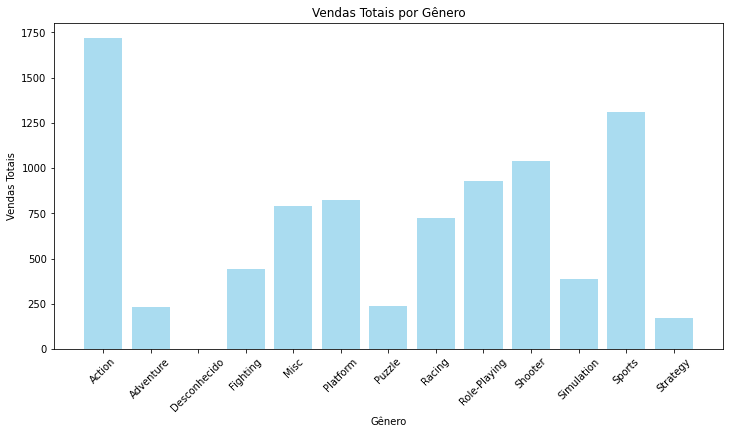

In [22]:
genre_sales = df.groupby('genre')['total_sales'].sum().reset_index()

# Criamos um gráfico de barras para as vendas totais por gênero.
plt.figure(figsize=(12, 6))
plt.bar(genre_sales['genre'], genre_sales['total_sales'], alpha=0.7, color='skyblue')

plt.xlabel('Gênero')
plt.ylabel('Vendas Totais')
plt.title('Vendas Totais por Gênero')
plt.xticks(rotation=45)  # Rotação dos labels do eixo x para melhor visualização

plt.show()

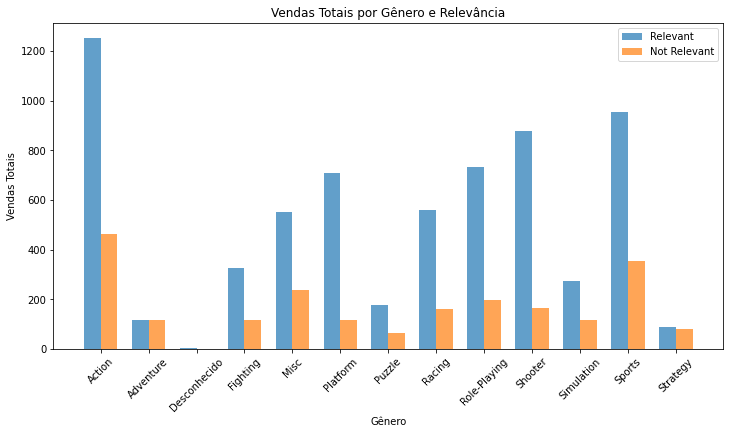

In [23]:
relevant_genre_sales = df.groupby(['genre', 'relevant'])['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
bar_width = 0.35

# Filtrando os dados para 'Relevant' e 'Not Relevant'.
relevant_sales = relevant_genre_sales[relevant_genre_sales['relevant'] == True]['total_sales']
not_relevant_sales = relevant_genre_sales[relevant_genre_sales['relevant'] == False]['total_sales']

# Precisamos de índices para o eixo x que correspondam ao número de gêneros únicos.
genres = relevant_genre_sales['genre'].unique()
index = np.arange(len(genres))

# As barras para 'Relevant'.
plt.bar(index, relevant_sales, bar_width, label='Relevant', alpha=0.7)

# As barras para 'Not Relevant'. Usamos index + bar_width para deslocar as barras e evitar sobreposição.
plt.bar(index + bar_width, not_relevant_sales, bar_width, label='Not Relevant', alpha=0.7)

plt.xlabel('Gênero')
plt.ylabel('Vendas Totais')
plt.title('Vendas Totais por Gênero e Relevância')
plt.xticks(index + bar_width / 2, genres, rotation=45)
plt.legend()

plt.show()

Como graficos o genero de ação  é superior tanto em vendas totais quanto em vendas relevantes se mostrando o jogo mais lucrativo. Como podemos ver aventura, puzzle e estrategia são de longe os menos lucrativos.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Boa análise! Jogos de gênero ação e esportes são "mainstream" e, muitas vezes, um mesmo título é lançado em diversas plataformas, o que pode justificar essa representatividade de títulos entre as plataformas.
</div>

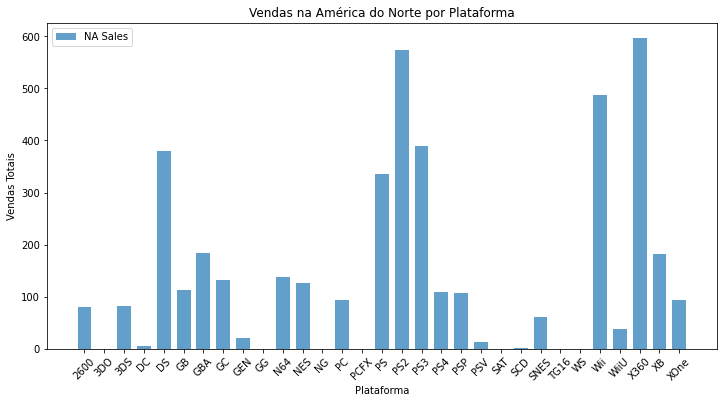

In [24]:
# Agrupando as vendas por plataforma e somando as vendas por país.
platform_country_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Configurações do gráfico para vendas na América do Norte
plt.figure(figsize=(12, 6))
bar_width = 0.7
index = np.arange(len(platform_country_sales['platform']))

plt.bar(index, platform_country_sales['na_sales'], bar_width, label='NA Sales', alpha=0.7)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais')
plt.title('Vendas na América do Norte por Plataforma')
plt.xticks(index, platform_country_sales['platform'], rotation=45)
plt.legend()
plt.show()

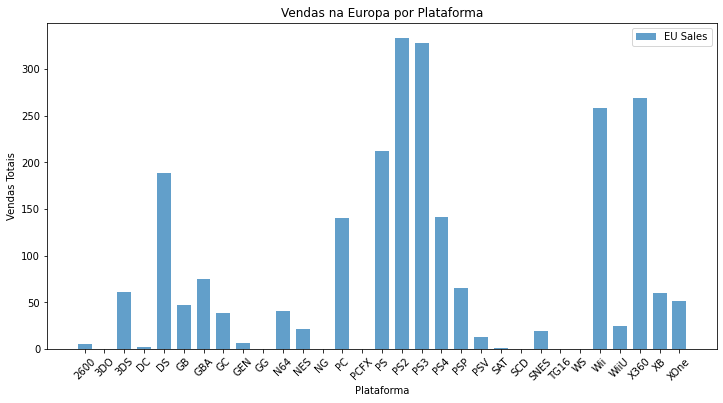

In [25]:
# Configurações do gráfico para vendas na Europa
plt.figure(figsize=(12, 6))

plt.bar(index, platform_country_sales['eu_sales'], bar_width, label='EU Sales', alpha=0.7)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais')
plt.title('Vendas na Europa por Plataforma')
plt.xticks(index, platform_country_sales['platform'], rotation=45)
plt.legend()
plt.show()

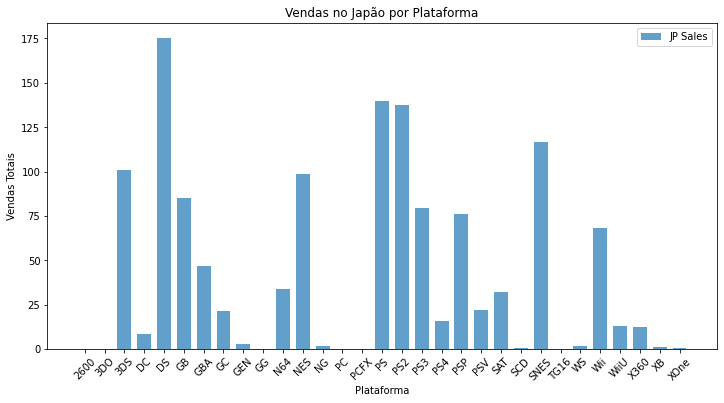

In [26]:
# Configurações do gráfico para vendas no Japão
plt.figure(figsize=(12, 6))

plt.bar(index, platform_country_sales['jp_sales'], bar_width, label='JP Sales', alpha=0.7)
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais')
plt.title('Vendas no Japão por Plataforma')
plt.xticks(index, platform_country_sales['platform'], rotation=45)
plt.legend()
plt.show()

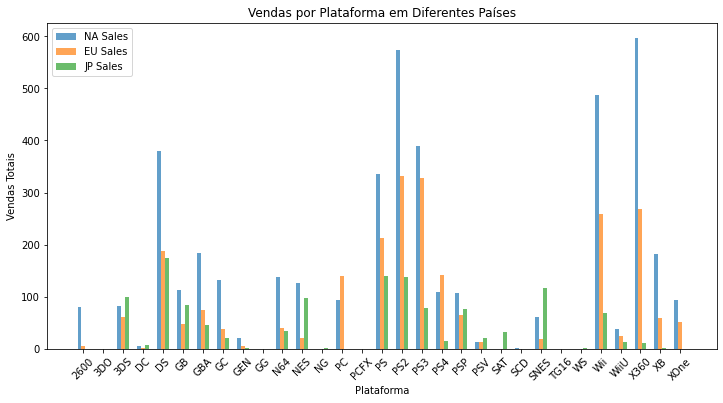

In [27]:
# Agrupando as vendas por gênero e somando as vendas por país.
genre_country_sales = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Agrupando as vendas por plataforma e somando as vendas por país.
platform_country_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Criando um gráfico de barras para vendas por plataforma em diferentes países.
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(platform_country_sales['platform']))

plt.bar(index, platform_country_sales['na_sales'], bar_width, label='NA Sales', alpha=0.7)
plt.bar(index + bar_width, platform_country_sales['eu_sales'], bar_width, label='EU Sales', alpha=0.7)
plt.bar(index + 2 * bar_width, platform_country_sales['jp_sales'], bar_width, label='JP Sales', alpha=0.7)

plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais')
plt.title('Vendas por Plataforma em Diferentes Países')
plt.xticks(index + bar_width, platform_country_sales['platform'], rotation=45)
plt.legend()

plt.show()

Vemos a predominancia das vendas dos Estados Unidos na grande maioria dos consoles perdendo apenas no PC, SAT,PS4, PSV, SNES.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Aqui você poderia criar um gráfico para cada país (lado a lado, por exemplo) para facilitar a leitura dos dados e, ainda assim, permitir a comparação entre eles. 
</div>

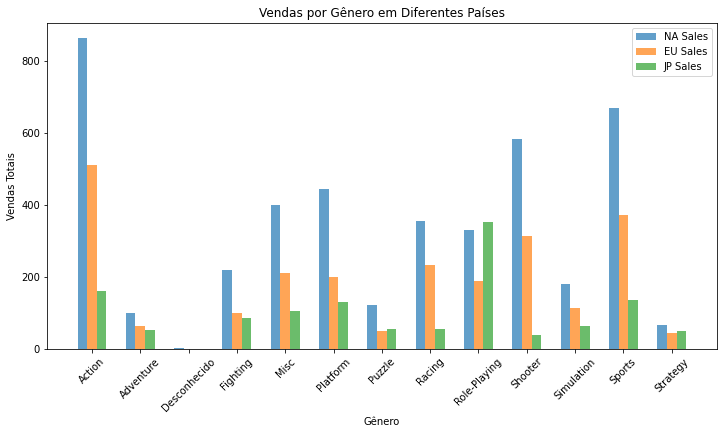

In [28]:
# Criando um gráfico de barras para vendas por gênero em diferentes países.
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(genre_country_sales['genre']))

plt.bar(index, genre_country_sales['na_sales'], bar_width, label='NA Sales', alpha=0.7)
plt.bar(index + bar_width, genre_country_sales['eu_sales'], bar_width, label='EU Sales', alpha=0.7)
plt.bar(index + 2 * bar_width, genre_country_sales['jp_sales'], bar_width, label='JP Sales', alpha=0.7)

plt.xlabel('Gênero')
plt.ylabel('Vendas Totais')
plt.title('Vendas por Gênero em Diferentes Países')
plt.xticks(index + bar_width, genre_country_sales['genre'], rotation=45)
plt.legend()

plt.show()

Vemos Estados Unidos com predomindancia em todos os generos, tendo ação ainda como mais popular.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Perfeito!
</div>

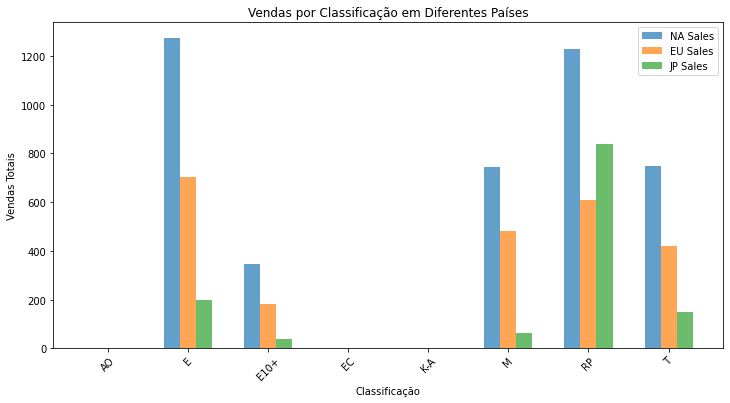

In [29]:
# Agrupando as vendas por classificação e somando as vendas por país.
rating_country_sales = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Criando um gráfico de barras para vendas por classificação em diferentes países.
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(rating_country_sales['rating']))

plt.bar(index, rating_country_sales['na_sales'], bar_width, label='NA Sales', alpha=0.7)
plt.bar(index + bar_width, rating_country_sales['eu_sales'], bar_width, label='EU Sales', alpha=0.7)
plt.bar(index + 2 * bar_width, rating_country_sales['jp_sales'], bar_width, label='JP Sales', alpha=0.7)

plt.xlabel('Classificação')
plt.ylabel('Vendas Totais')
plt.title('Vendas por Classificação em Diferentes Países')
plt.xticks(index + bar_width, rating_country_sales['rating'], rotation=45)
plt.legend()

plt.show()

Aparentemente a classificação não atrapalha nas vendasuma vez que as vendas se monstram signicativas independente da faixa etaria.

In [30]:
# Certificando-se de que a coluna 'user_score' é numérica.
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Agora, vamos obter as classificações dos usuários para cada plataforma.
xbox_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()
ps4_scores = df[df['platform'] == 'PS4']['user_score'].dropna()

# Teste t para amostras independentes para Xbox One vs PC
t_stat_xbox_pc, p_val_xbox_pc = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)

# Teste t para amostras independentes para Xbox One vs PS4
t_stat_xbox_ps4, p_val_xbox_ps4 = st.ttest_ind(xbox_scores, ps4_scores, equal_var=False)

# Teste t para amostras independentes para PC vs PS4
t_stat_pc_ps4, p_val_pc_ps4 = st.ttest_ind(pc_scores, ps4_scores, equal_var=False)

# Definição do limiar alfa
alpha = 0.05

# Saída dos resultados
print(f"Xbox One vs PC:\nT-statistic: {t_stat_xbox_pc}, P-value: {p_val_xbox_pc}")
print(f"Xbox One vs PS4:\nT-statistic: {t_stat_xbox_ps4}, P-value: {p_val_xbox_ps4}")
print(f"PC vs PS4:\nT-statistic: {t_stat_pc_ps4}, P-value: {p_val_pc_ps4}")

# Interpretação dos resultados para Xbox One vs PC
if p_val_xbox_pc < alpha:
    print("Há uma diferença estatisticamente significativa entre Xbox One e PC.")
else:
    print("Não há uma diferença estatisticamente significativa entre Xbox One e PC.")

# Interpretação dos resultados para Xbox One vs PS4
if p_val_xbox_ps4 < alpha:
    print("Há uma diferença estatisticamente significativa entre Xbox One e PS4.")
else:
    print("Não há uma diferença estatisticamente significativa entre Xbox One e PS4.")

# Interpretação dos resultados para PC vs PS4
if p_val_pc_ps4 < alpha:
    print("Há uma diferença estatisticamente significativa entre PC e PS4.")
else:
    print("Não há uma diferença estatisticamente significativa entre PC e PS4.")


Xbox One vs PC:
T-statistic: -3.861003148295023, P-value: 0.00013349751690568346
Xbox One vs PS4:
T-statistic: 2.05414521087192, P-value: 0.04043864436797827
PC vs PS4:
T-statistic: 6.924465827392202, P-value: 1.0531817223629988e-11
Há uma diferença estatisticamente significativa entre Xbox One e PC.
Há uma diferença estatisticamente significativa entre Xbox One e PS4.
Há uma diferença estatisticamente significativa entre PC e PS4.


Este código verifica se as classificações médias dos usuários para as plataformas Xbox One e PC são as mesmas, e também para as plataformas Xbox One e PS4, e PC e PS4, usando um teste t de Student para amostras independentes. Ele define as hipóteses nula e alternativa para cada comparação e fornece a interpretação dos resultados com base no p-valor obtido e no limiar alfa estabelecido.
O valor de alfa é o nível de significância que você escolhe para o seu teste estatístico. É o limiar para decidir se a evidência é suficientemente forte para rejeitar a hipótese nula. No código fornecido, você definiu alpha = 0.05, o que é um padrão comum na pesquisa estatística, representando um risco de 5% de cometer um erro do tipo I (rejeitar a hipótese nula incorretamente).
*Conclusões*
Xbox One vs PC:Há uma diferença estatisticamente significativa entre as classificações médias dos usuários das plataformas Xbox One e PC. O p-valor muito pequeno (menor que 0.05) nos permite rejeitar a hipótese nula de igualdade das médias com alta confiança.
Xbox One vs PS4:Não há uma diferença estatisticamente significativa entre as classificações médias dos usuários das plataformas Xbox One e PS4. O p-valor é maior que o limiar alfa de 0.05, indicando que não temos evidência suficiente para rejeitar a hipótese nula de igualdade das médias.
PC vs PS4:Há uma diferença estatisticamente significativa entre as classificações médias dos usuários das plataformas PC e PS4. O p-valor é menor que 0.05, o que sugere que as médias são significativamente diferentes.


*Conclusão da hipótese*
Estes resultados indicam que as percepções dos usuários em relação a essas plataformas podem variar significativamente. As classificações médias dos usuários do Xbox One diferem das do PC, potencialmente sugerindo uma preferência ou percepção de qualidade distinta entre as duas plataformas. No entanto, não foi observada uma diferença significativa entre as classificações dos usuários do Xbox One e do PS4, o que poderia indicar percepções de qualidade similares entre essas duas plataformas. Por outro lado, as classificações médias dos usuários do PC diferem das do PS4, indicando outra vez uma percepção de qualidade diferente entre essas plataformas.

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Ótima análise e conclusões. Isso realmente pode indicar preferências dos usuários por plataformas específicas, além de mostrar como a qualidade de títulos entre consoles diferentes pode ser muito similar. Ao executar o teste de hipótese, considere definir explicitamente a sua hipótese nula e alteranativa para cada caso de comparação. 
</div>

*Conclusão geral:*
Podemos observar que o mundo dos games possuiu uma grande crescente tanto em produção quanto em lucro que se acentuou até 2010 depois decaiu até 2016, o favoritismo de generos mais ativos como ação se mostrou notavel não so nos Estados Unidos, pais que se provou maior consumidor de jogos, mas também nos na europa e no japão.

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>

<s>Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Análises bem detalhadas em cada etapa do projeto
- Análises estatísticas bem fundamentadas
    
Entretanto, deixei alguns comentários em alguns trechos que precisam de ajuste. Em resumo, precisamos:
- Verificar a distribuição dos dados de vendas por plataforma
- Validar o preenchimento de valores nulos para atributos numéricos
- Exibir a quantidade de vendas para as plataformas mais populares
    

Não se preocupe, essa etapa faz parte do processo de aprendizado e é importante para consolidar o conhecimento. Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**</s>

</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. O sua análise ficou bem completa e detalhada. Lembre-se de se atentar ao tipo de dado ao fazer o preenchimento de valores ausentes, pois isso pode impactar diretamente nos resultados dos seus estudos.
    
<br>
    
Espero que você tenha aprendido bastante com esse projeto. Te desejo sucesso e uma jornada de muito aprendizado. 
    
<br>
    
**Até breve!**

</div>
